#### 1.数据导入

In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [86]:
df = pd.read_csv("house_data.csv")
df.rename(columns={'面积(㎡)':'面积'},inplace=True)
df.head()


,Unnamed: 0,标题,价格(元/月),片区,lng,lat,nearest_station_id,distance_km,station_name,区域,面积,rent_per_unit
0,0,整租·上海康城 2室1厅 南,4300,闵行-莘闵别墅-上海康城,121.436307,31.188334,1号线,0.6212,上海体育馆,闵行,104.13,41.294536
1,1,整租·长寿新村(闵行) 2室1厅 南,3736,闵行-莘庄南广场-长寿新村(闵行),121.379555,31.105967,5号线,0.7990,莘庄,闵行,67.02,55.744554
2,2,整租·凤庆小区 2室1厅 南,3000,闵行-老闵行-凤庆小区,121.402035,31.013607,5号线,0.8198,金平路,闵行,53.23,56.359196
3,3,整租·中骏广场 1室0厅 南,5000,闵行-华漕-中骏广场,121.314147,31.211750,17号线,2.0180,虹桥火车站,闵行,50.00,100.000000
4,4,整租·鑫都城云天绿洲 1室2厅 南,4000,闵行-颛桥-鑫都城云天绿洲,121.392574,31.052428,5号线,1.8442,颛桥,闵行,58.00,68.965517


In [87]:
df.describe()

,Unnamed: 0,价格(元/月),lng,lat,distance_km,面积,rent_per_unit
count,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000
mean,1367.500000,8038.190789,121.424869,31.149194,0.777339,79.002873,104.413618
std,789.959493,9729.422800,0.042650,0.053487,0.591949,47.889676,139.545514
min,0.000000,1400.000000,121.079379,30.999343,0.000000,1.000000,21.997360
25%,683.750000,4500.000000,121.404975,31.121744,0.454825,50.137500,70.414592
50%,1367.500000,5800.000000,121.433831,31.164717,0.621200,66.985000,93.221858
75%,2051.250000,8307.500000,121.446367,31.188334,0.905100,94.317500,124.622110
max,2735.000000,300000.000000,121.546334,31.234498,5.430100,602.110000,7000.000000


In [88]:
# 设置中文显示（Windows系统需要安装SimHei字体）
plt.rcParams['font.sans-serif'] = ['SimHei']  # 使用黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

#### 2.直方图

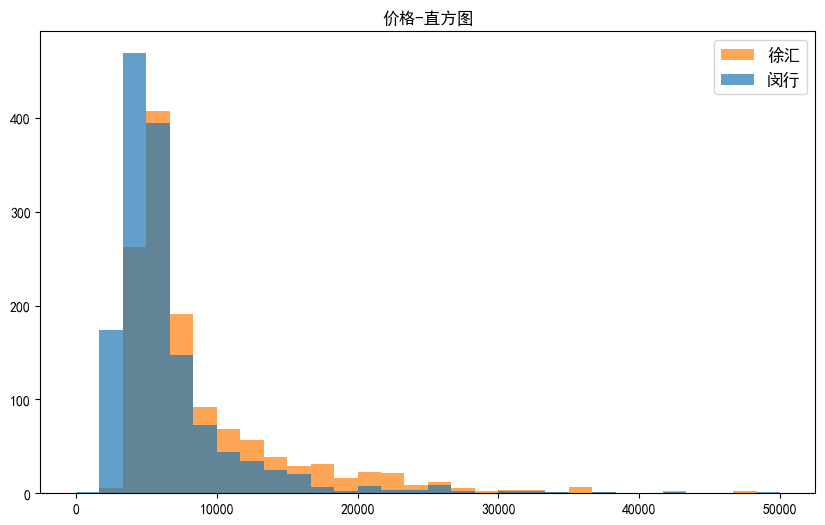

In [89]:
plt.figure(figsize=(10, 6))

region_a = df[df['区域'] == '闵行']
region_b = df[df['区域'] == '徐汇']
# 设置直方图参数
alpha = 0.7  # 透明度

# 绘制区域B的直方图
plt.hist(region_b['价格(元/月)'], bins=30,range=(0, 50000) ,alpha=alpha, color='#ff7f0e', 
         label='徐汇')

# 绘制区域A的直方图
plt.hist(region_a['价格(元/月)'], bins=30,range=(0, 50000), alpha=alpha, color='#1f77b4', 
         label='闵行')

plt.legend(loc='upper right', fontsize=12)
plt.title("价格-直方图")
plt.show()


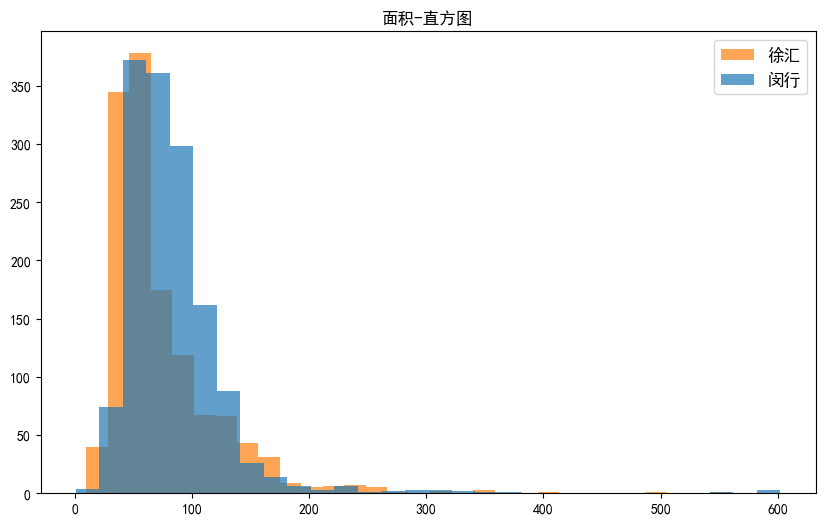

In [90]:
plt.figure(figsize=(10, 6))

# 设置直方图参数
alpha = 0.7  # 透明度

# 绘制区域B的直方图
plt.hist(region_b['面积'], bins=30,alpha=alpha, color='#ff7f0e', 
         label='徐汇')

# 绘制区域A的直方图
plt.hist(region_a['面积'], bins=30, alpha=alpha, color='#1f77b4', 
         label='闵行')

plt.legend(loc='upper right', fontsize=12)
plt.title("面积-直方图")
plt.show()

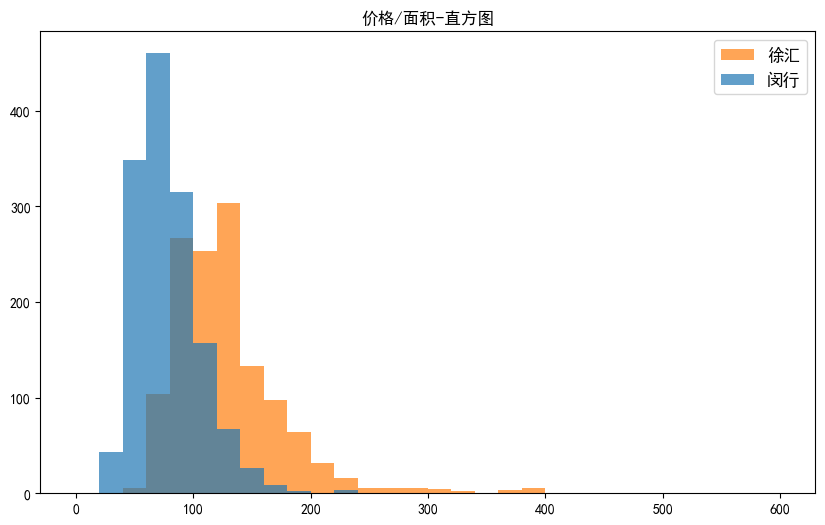

In [91]:
plt.figure(figsize=(10, 6))

# 设置直方图参数
alpha = 0.7  # 透明度

# 绘制区域B的直方图
plt.hist(region_b['rent_per_unit'], bins=30,range=(0,600),alpha=alpha, color='#ff7f0e', 
         label='徐汇')

# 绘制区域A的直方图
plt.hist(region_a['rent_per_unit'], bins=30,range=(0,600), alpha=alpha, color='#1f77b4', 
         label='闵行')

plt.legend(loc='upper right', fontsize=12)
plt.title("价格/面积-直方图")
plt.show()

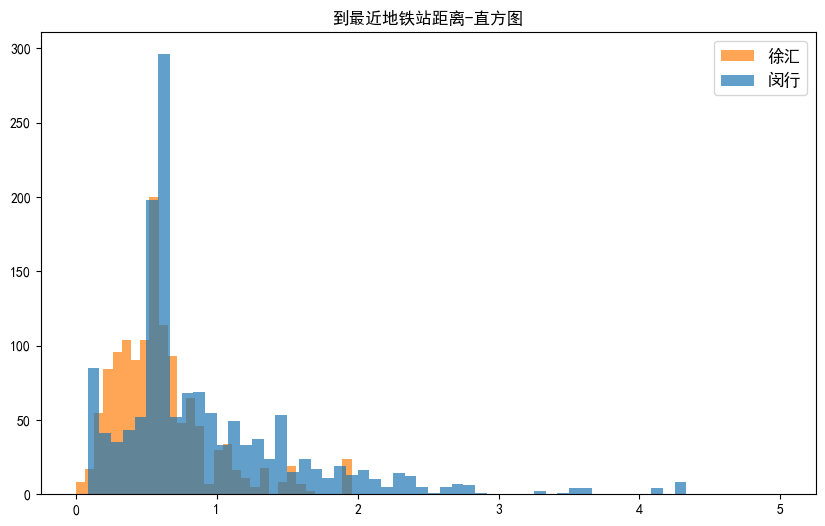

In [92]:
plt.figure(figsize=(10, 6))

# 设置直方图参数
alpha = 0.7  # 透明度

# 绘制区域B的直方图
plt.hist(region_b['distance_km'], bins=30,alpha=alpha, color='#ff7f0e', 
         label='徐汇')

# 绘制区域A的直方图
plt.hist(region_a['distance_km'], bins=60, range=(0,5) ,alpha=alpha, color='#1f77b4', 
         label='闵行')

plt.legend(loc='upper right', fontsize=12)
plt.title("到最近地铁站距离-直方图")
plt.show()

#### 3.堆叠条线图

C:\Users\XXH\AppData\Local\Temp\ipykernel_69996\908394930.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  price_dist = df.groupby(['价格分段', '区域']).size().unstack().fillna(0)


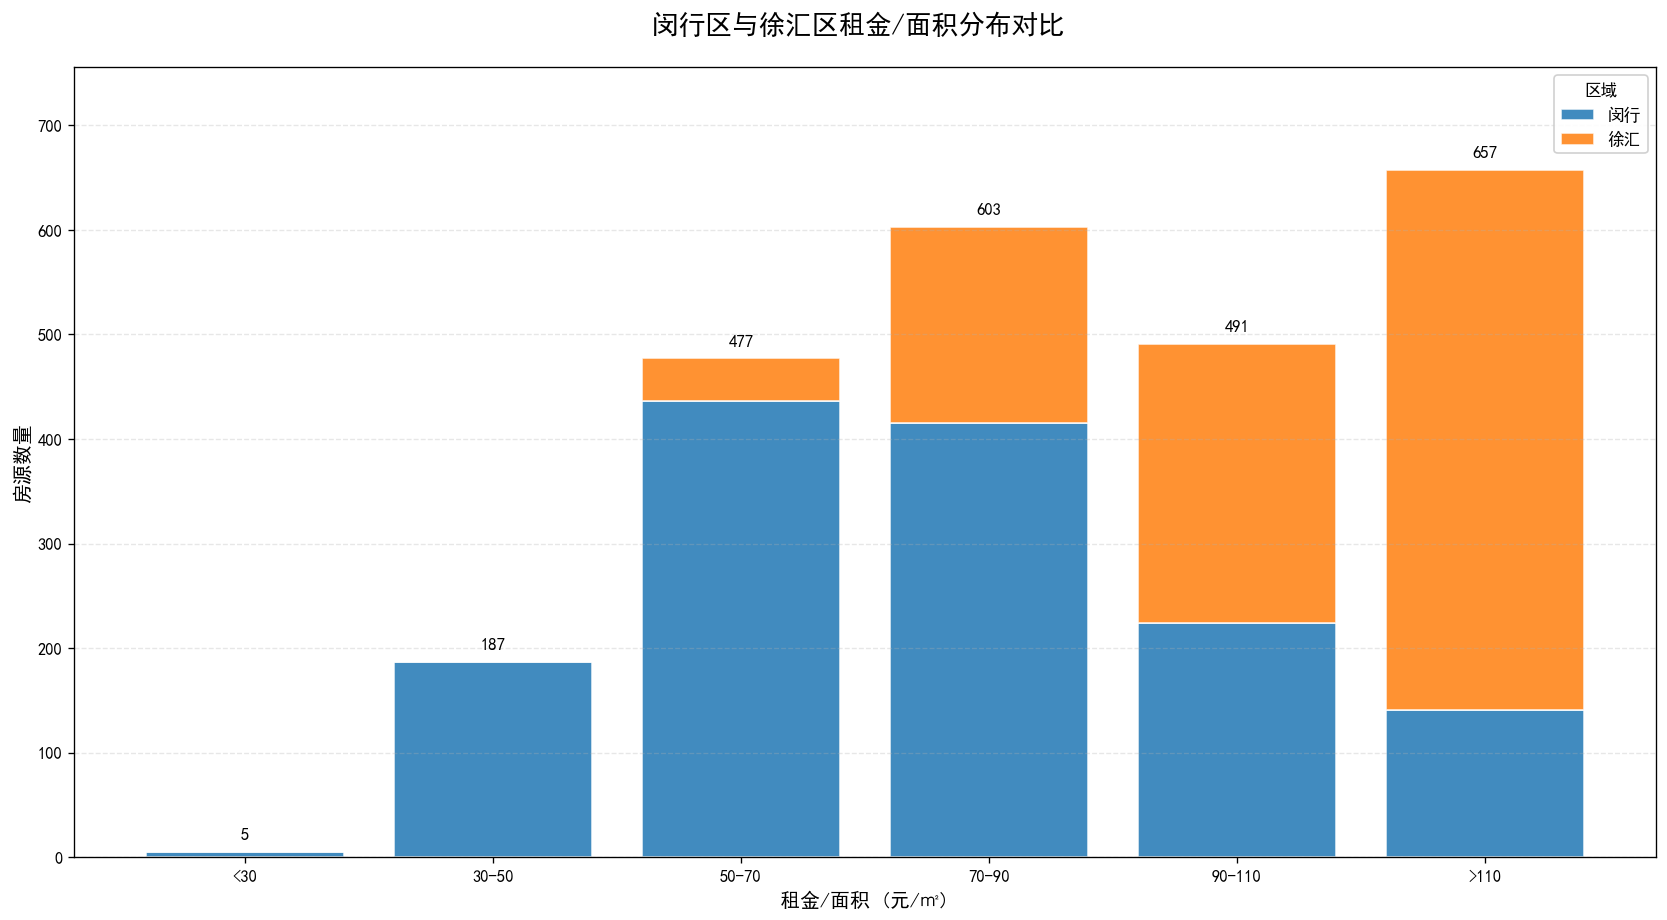

In [100]:
bins = [0, 30, 50, 70, 90, 110, 150]
labels = ['<30', '30-50', '50-70', '70-90', '90-110', '>110']
df['价格分段'] = pd.cut(df['rent_per_unit'], bins=bins, labels=labels)

# 计算各区域在各价格分段的计数
price_dist = df.groupby(['价格分段', '区域']).size().unstack().fillna(0)

# 计算各区域在各价格分段的占比
price_perc = price_dist.div(price_dist.sum(axis=0), axis=1) * 100

# 创建专业堆叠条形图
plt.figure(figsize=(14, 8), dpi=120)

# 设置颜色
colors = {'闵行': '#1f77b4', '徐汇': '#ff7f0e'}

# 绘制堆叠条形图
bottom = np.zeros(len(price_dist))
for region in ['闵行', '徐汇']:
    plt.bar(
        price_dist.index,
        price_dist[region],
        bottom=bottom,
        color=colors[region],
        edgecolor='white',
        # linewidth=1,
        alpha=0.85,
        label=region
    )
    bottom += price_dist[region]



# 添加总数标签
for i, total in enumerate(bottom):
    plt.text(
        i, 
        total + 10, 
        f'{total:.0f}',
        ha='center',
        va='bottom',
        color='black',
        fontsize=10
    )

# 添加标题和标签
plt.title('闵行区与徐汇区租金/面积分布对比 ', fontsize=16, pad=20)
plt.xlabel('租金/面积 (元/㎡)', fontsize=12)
plt.ylabel('房源数量', fontsize=12)

# 添加图例
plt.legend(title='区域', loc='upper right', frameon=True, framealpha=0.9)

# 添加网格
plt.grid(axis='y', linestyle='--', alpha=0.3)

# 设置y轴范围
plt.ylim(0, bottom.max() * 1.15)


# 优化布局
plt.tight_layout()
plt.subplots_adjust(bottom=0.1)

plt.show()

#### 4.散点图

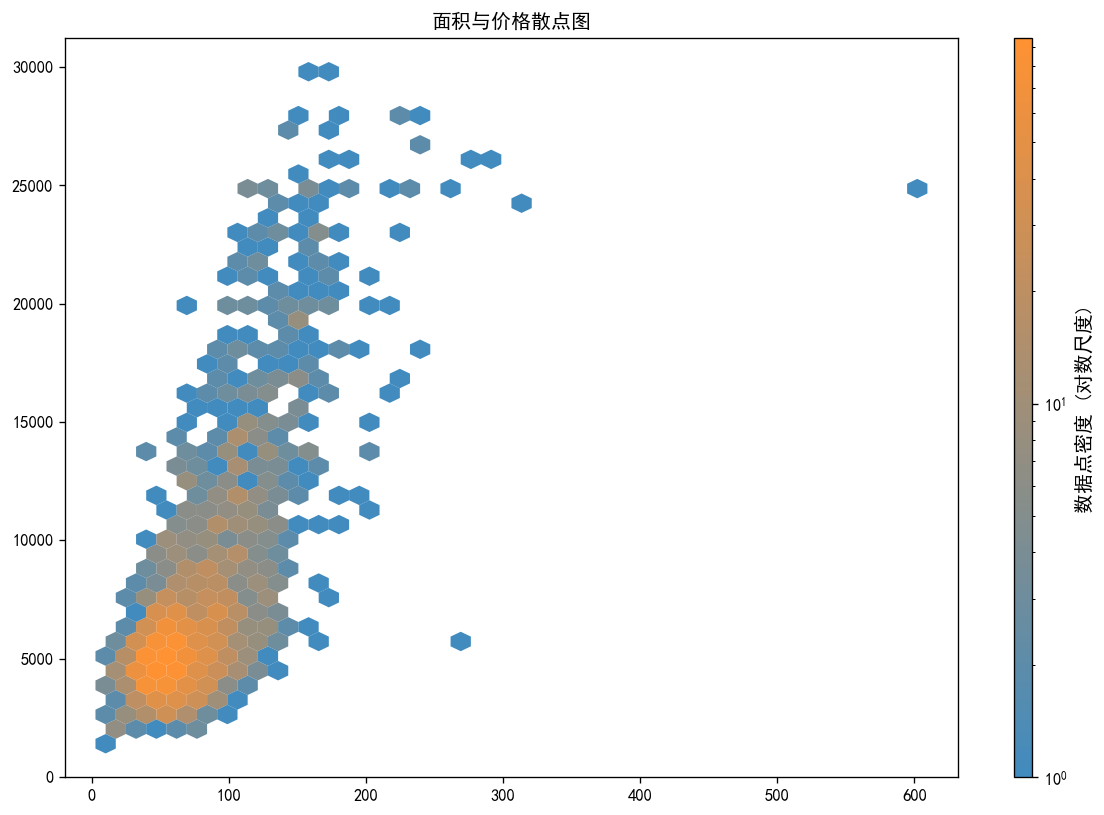

In [93]:
# 创建专业六边形分箱图

df_low = df[df["价格(元/月)"]<30000]
df_low = df_low[df_low["rent_per_unit"]<1000]
import matplotlib.colors as mcolors
plt.figure(figsize=(12, 8), dpi=120)
colors = ['#1f77b4', '#ff7f0e']
cmap = mcolors.LinearSegmentedColormap.from_list("custom_cmap", colors, N=256)


hexbin = plt.hexbin(
    x=df_low['面积'],
    y=df_low['价格(元/月)'],
    gridsize=40,  # 控制六边形数量
    cmap=cmap,    # 使用自定义颜色映射
    mincnt=1,     # 最小计数为1
    edgecolors='none',  # 无边框
    alpha=0.85,   # 透明度
    bins='log'    # 使用对数刻度计数
)

cb = plt.colorbar(hexbin, pad=0.05, aspect=40)
cb.set_label('数据点密度 (对数尺度)', fontsize=12)
# 显示图表
plt.title('面积与价格散点图')
plt.show()

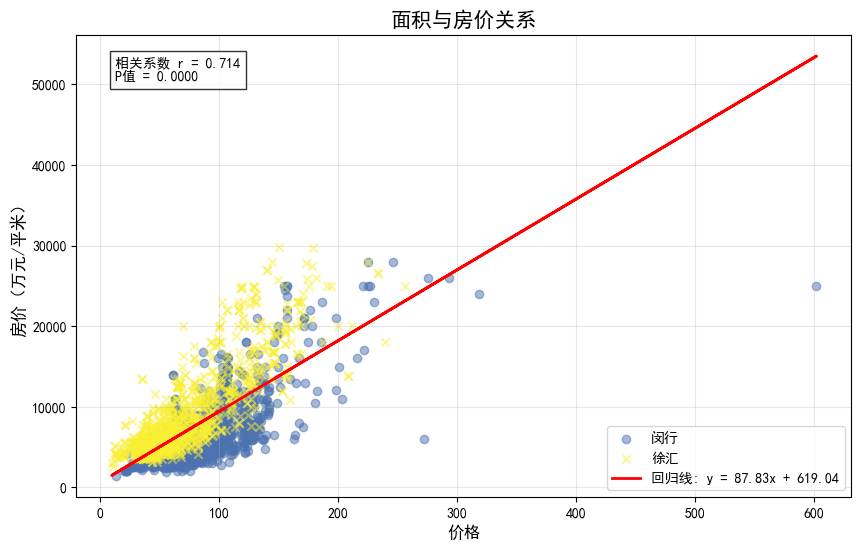

In [94]:
from scipy import stats

region_M_low = df_low[df_low['区域'] == '闵行']
region_X_low = df_low[df_low['区域'] == '徐汇']
area_M = region_M_low['面积']  # 到地铁站距离
prices_M = region_M_low["价格(元/月)"]    # 房价
area_X = region_X_low['面积']  # 到地铁站距离
prices_X = region_X_low["价格(元/月)"]    # 房价

area = df_low['面积']  # 到地铁站距离
prices = df_low["价格(元/月)"]    # 房价

# 计算回归参数
slope, intercept, r_value, p_val, _ = stats.linregress(area, prices)
regression_line = slope * area + intercept

# 绘制散点图与回归线
plt.figure(figsize=(10,6))
plt.scatter(area_M, prices_M, alpha=0.5, color='#4C72B0',label='闵行')
plt.scatter(area_X, prices_X, alpha=0.5, color="#F9EF33",marker='x', label='徐汇')
plt.plot(area, regression_line, 'r-', linewidth=2, 
         label=f'回归线: y = {slope:.2f}x + {intercept:.2f}')
plt.text(0.05, 0.9, f'相关系数 r = {r_value:.3f}\nP值 = {p_val:.4f}',
         transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.8))

# 图表美化
plt.title('面积与房价关系', fontsize=15)
plt.xlabel('面积', fontsize=12)
plt.ylabel('价格(元/月)	', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.show()

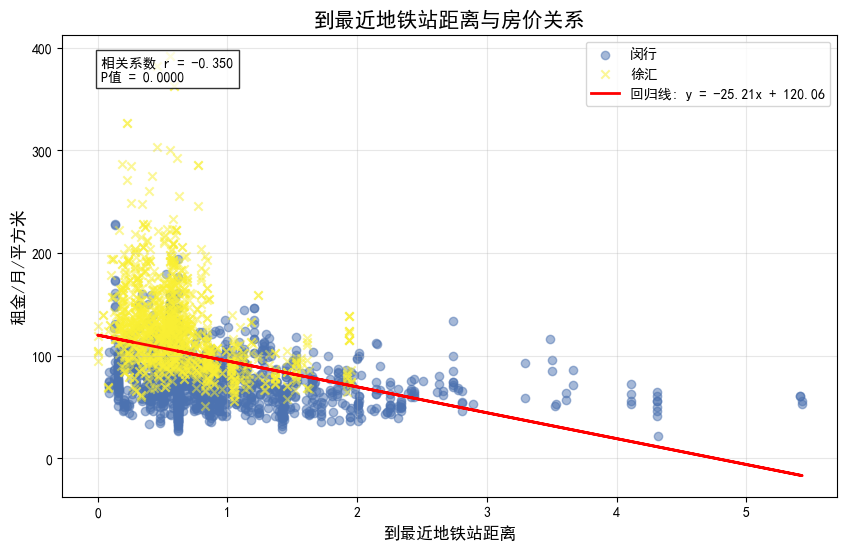

In [ ]:
from scipy import stats

region_M_low = df_low[df_low['区域'] == '闵行']
region_X_low = df_low[df_low['区域'] == '徐汇']
distance_M = region_M_low['distance_km']  # 到地铁站距离
prices_M = region_M_low["rent_per_unit"]    # 房价
distance_X = region_X_low['distance_km']  # 到地铁站距离
prices_X = region_X_low["rent_per_unit"]    # 房价

distance = df_low['distance_km']  # 到地铁站距离
prices = df_low["rent_per_unit"]    # 房价

# 计算回归参数
slope, intercept, r_value, p_val, _ = stats.linregress(distance, prices)
regression_line = slope * distance + intercept

# 绘制散点图与回归线
plt.figure(figsize=(10,6))
plt.scatter(distance_M, prices_M, alpha=0.5, color='#4C72B0',label='闵行')
plt.scatter(distance_X, prices_X, alpha=0.5, color="#F9EF33",marker='x', label='徐汇')
plt.plot(distance, regression_line, 'r-', linewidth=2, 
         label=f'回归线: y = {slope:.2f}x + {intercept:.2f}')
plt.text(0.05, 0.9, f'相关系数 r = {r_value:.3f}\nP值 = {p_val:.4f}',
         transform=plt.gca().transAxes, bbox=dict(facecolor='white', alpha=0.8))

# 图表美化
plt.title('到最近地铁站距离与房价关系', fontsize=15)
plt.xlabel('到最近地铁站距离(km)', fontsize=12)
plt.ylabel('租金/月/平方米', fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.show()

#### 5.箱型图

C:\Users\XXH\AppData\Local\Temp\ipykernel_69996\2662075963.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_to_plot, labels=['闵行', '徐汇'], patch_artist=True, whis = [5, 10])


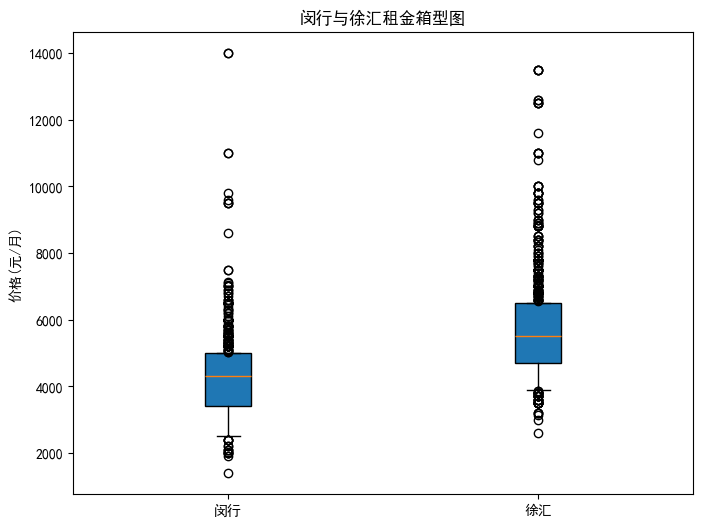

In [116]:
plt.figure(figsize=(8, 6))

median_area = df['面积'].median()
MH_data = df[df['区域'] == '闵行']
XH_data = df[df["区域"]=="徐汇"]

data_to_plot = [MH_data[MH_data["面积"]<100]['价格(元/月)'], XH_data[XH_data["面积"]<100]['价格(元/月)']]
plt.boxplot(data_to_plot, labels=['闵行', '徐汇'], patch_artist=True, whis = [5, 10])
plt.ylabel('价格(元/月)')
plt.title('闵行与徐汇租金箱型图')
plt.show()

#### 6.饼图

In [57]:
import pandas as pd
import numpy as np
from pyecharts.charts import Pie
from pyecharts import options as opts
from pyecharts.globals import ThemeType

# # 定义租金区间
bins = [0, 3000, 4000, 5000, 6000,7000, 10000,20000, float('inf')]
labels = ['3000以下', '3000-4000', '4000-5000','5000-6000', '6000-7000','7000-10000', '10000-20000','20000以上']

# 将租金分类到区间
df['租金区间'] = pd.cut(df['价格(元/月)'], bins=bins, labels=labels, right=False)
# 统计每个区间的数量
rent_counts = df['租金区间'].value_counts()

# 准备玫瑰图数据（格式为[(区间名称, 数量), ...]）
data = [(interval, int(count)) for interval, count in zip(rent_counts.index, rent_counts.values)]

# 创建南丁格尔玫瑰图
rose = (
    Pie()
    .add(
        series_name="租金区间",
        data_pair=data,
        radius=["30", "75%"],  # 内外半径比
        rosetype="radius",
        )
)

# rose.render("rent_rose_chart.html")
# print("南丁格尔玫瑰图已生成: rent_rose_chart.html")
rose.render_notebook()

#### 7.词云图

In [120]:
import pandas as pd
import re
from collections import Counter
from pyecharts.charts import WordCloud
from pyecharts import options as opts
# import jieba

# 定义提取函数
def extract_info(title):
    info = {'room_type': None, 'direction': None}
    
    # 提取X室X厅 (处理可能的空格和特殊字符)
    room_match = re.search(r'(\d+室\d*厅)', title)
    if room_match:
        info['room_type'] = room_match.group(1)
    
    # 提取方向信息 (匹配中文方向词)
    directions = re.findall(r'[东南西北]+', title.split()[-1])
    if directions:
        # 将多词方向拆分为单个字符
        info['direction'] = ' '.join(' '.join(d) for d in directions).split()  
    return info

# 应用提取函数
df['extracted'] = df['标题'].apply(extract_info)

# 准备词云数据
words = []
for info in df['extracted']:
    if info['room_type']:
        # 将"2室1厅"格式拆分为单独的词语
        room_words = re.findall(r'\d+[室厅]', info['room_type'])
        words.extend(room_words)
    
    if info['direction']:
        # 将"南北"拆分为"南"和"北"
        for d in info['direction']:
            if len(d) > 1:
                words.extend(list(d))
            else:
                words.append(d)

# 统计词频
word_counts = Counter(words)

# 生成词云图
wordcloud = (
    WordCloud()
    .add(
        series_name="租房特征",
        data_pair=[(word, count) for word, count in word_counts.items()],
        word_size_range=[20, 80],
        shape="circle"
    )
    .set_global_opts(
        title_opts=opts.TitleOpts(
            title="租房户型与方向分析",
            title_textstyle_opts=opts.TextStyleOpts(font_size=23)
        ),
        tooltip_opts=opts.TooltipOpts(is_show=True)
    )
)

# 保存为HTML文件
wordcloud.render_notebook()